# РК1 по дисциплине Технологии машинного обучения
Давидян Б.А. ИУ5-62Б 
Вариант 4  
Датасет: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Загрузка данных
df = pd.read_csv('data/heart_rk.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
#Анализ и удаление пропусков
print('Количество пропусков в каждом столбце:')
print(df.isnull().sum())

# Удалим строки с пропусками
df_clean = df.dropna()
print('\nРазмер после удаления пропусков:', df_clean.shape)

Количество пропусков в каждом столбце:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Размер после удаления пропусков: (1025, 14)


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


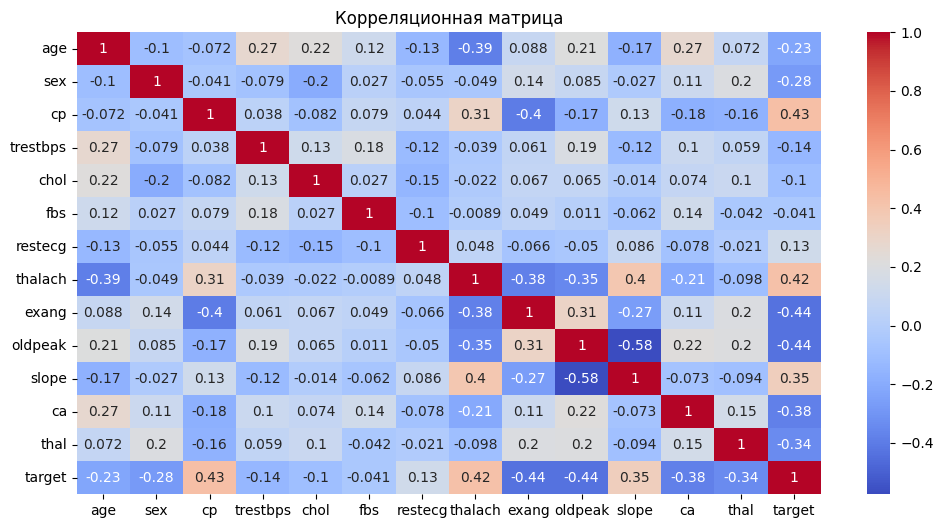

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [10]:
#Корреляционный анализ
# Выберем числовые признаки
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
corr_matrix = df_clean[numeric_cols].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

corr_matrix

**Выводы:**
- Наиболее сильно влияющими на целевое значение `target` признаками с положительной корреляцией являются `cp`(тип боли в груди) 0,43, `thalach`(максимальная достигнутая частота сердечных сокращений) 0,42, `slope`(наклон сегмента ST пиковой нагрузки) 0,35
  
- Наиболее сильно влияющими на целевое значение `target` признаками с отрицательной корреляцией являются `exang`(стенокардия, вызванная физической нагрузкой) -0,44, `oldpeak`(Депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя) -0,44, `ca`(наклон пиковой нагрузки сегмента ST) -0,38

- Для обучения моделей можно использовать признаки `cp`, `exang` и `oldpeak`.

**Вывод о моделировании:**
- После подготовки данных можно применять модели, такие как линейная регрессия, решающие деревья и т.д.
- Наиболее вклад будут вносить `cp`, `exang` и `oldpeak`, так как они имеют наиболее приближенный к 1 модуль значения корреляции
- Также перед обучением моделей категориальные признаки можно закодировать с помощью OneHotEncoder